<a href="https://colab.research.google.com/github/KYGokul/Black-Friday-Sales-Prediction/blob/main/Black_Friday_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Regression - Black Friday Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Submitted by**    - K.Gokul

# **Project Summary -**

Black Friday is one of the biggest shopping events of the year, where customers flock to stores and online platforms to take advantage of significant discounts and promotions. Retailers aim to maximize their sales and profits during this period by offering attractive deals. Understanding customer behavior and predicting their purchase patterns is crucial for creating personalized offers and enhancing the shopping experience.

This is data from a retail store, collected during a Black Friday sales event. The dataset includes key columns such as user ID, product ID, gender, age, and purchase amount, with some columns masked for privacy, including city, occupation, marital status, and three product categories.

The objective of this project is to predict sales amounts using various machine learning models. Our approach involves:

1. **Exploratory Data Analysis (EDA)**: Understanding the distribution of features and their relationships with the purchase amount.
2. **Data Preprocessing**: Handling missing values and encoding categorical variables.
3. **Model Building**: Implementing different machine learning models:
   - **Linear Regression**: For capturing linear relationships.
   - **Random Forest**: For capturing non-linear relationships.
   - **XGBoost**: For efficient and scalable boosting algorithms.
4. **Model Evaluation**: Using metrics like Mean Squared Error(MSE)Root Mean Squared Error (RMSE), R2 Score, Adjusted R2 Score and Mean Absolute Error(MAE) to assess performance.
5. **Hyperparameter Tuning**: Fine-tuning the best model to achieve optimal performance.

By accurately predicting purchase amounts, we aim to help the retail store create personalized offers, optimize inventory, and enhance customer satisfaction.

# **GitHub Link -**

https://github.com/KYGokul/Black-Friday-Sales-Prediction

# **Problem Statement**


**Write Problem Statement Here.**

The goal of this project is to predict the purchase amounts of customers during Black Friday sales using a retail store's dataset. The data includes user demographics, product details, and purchase amounts, with some columns masked for privacy. We aim to utilize various machine learning models such as Random Forest, Gradient Boosting, and XGBoost to achieve accurate predictions. By doing so, we can help the retailer create personalized offers, optimize inventory management, and enhance customer satisfaction.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

!pip install mplfinance
import mplfinance as mpf

from datetime import datetime

from scipy import stats

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.preprocessing import (MinMaxScaler,StandardScaler)
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

!pip install shap
import shap

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 783.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.6 MB/s eta 0:00:00


### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv("/content/Black Friday Data.csv")

### Dataset First View

In [ ]:
# Dataset First rows Look
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
# Dataset last rows look
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(550068, 12)

**There are 5,50,068 rows and 12 columns in our dataset.**

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

**There are zero duplicate values in our dataset.**

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
# Calculate the number of missing values in the 'Product_Category_2' column
product_cat_2_missing = df[['Product_Category_2']].isnull().sum()

# Calculate the percentage of missing values in the 'Product_Category_2' column
percent_of_missing = round((product_cat_2_missing / df.shape[0]) * 100, 2)

# Extract the value from the resulting series
percent_of_missing_value = percent_of_missing['Product_Category_2']

# Print the percentage of missing values in the 'Product_Category_2' column
print(f'The percentage of missing values in Product_Category_2 is {percent_of_missing_value} %')

The percentage of missing values in Product_Category_2 is 31.57 %


In [ ]:
# Calculate the number of missing values in the 'Product_Category_3' column
product_cat_3_missing = df[['Product_Category_3']].isnull().sum()

# Calculate the percentage of missing values in the 'Product_Category_3' column
percent_of_missing = round((product_cat_3_missing / df.shape[0]) * 100, 2)

# Extract the value from the resulting series
percent_of_missing_value = percent_of_missing['Product_Category_3']

# Print the percentage of missing values in the 'Product_Category_3' column
print(f'The percentage of missing values in Product_Category_3 is {percent_of_missing_value} %')

The percentage of missing values in Product_Category_3 is 69.67 %


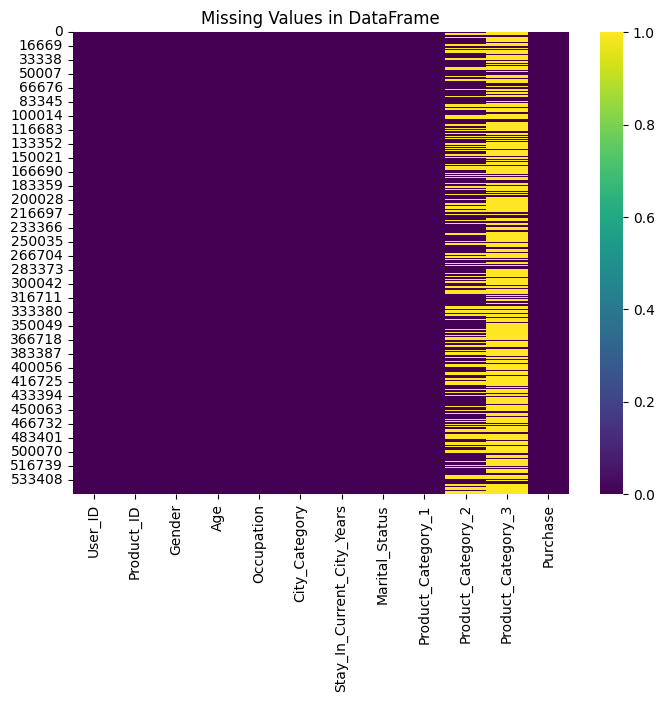

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values in DataFrame')
plt.show()

### What did you know about your dataset?

The dataset contains information from a retail store's Black Friday sales, aiming to predict sales based on various parameters. It includes 12 columns and 550,068 rows, and it is free of duplicate values.

Notably, the 'Product_Category_2' column has 31.57% missing values, and 'Product_Category_3' has 69.67% missing values. The first nine columns, which contain the most critical information, do not have any missing data.

The missing values in 'Product_Category_2' (31.57%) can be imputed. The high percentage of missing data in 'Product_Category_3' (69.67%) may be due to certain transactions or products not falling into this category. Dropping this feature should not significantly impact our analysis and predictions.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Variables Description

**Independent Variables**
1. **User_ID** - Unique identifier for each user
2. **Product_ID** - Unique identifier for each product
3. **Gender** - Gender of the user (M/F)
4. **Age** - Age range of the user
5. **Occupation** - Occupation code of the user
6. **City_Category** - Category of the city (A/B/C)
7. **Stay_In_Current_City_Years** - Number of years the user has stayed in the current city
8. **Marital_Status** - Marital status of the user
9. **Product_Category_1** - Product category (1st Category)
10. **Product_Category_2** - Product category (2nd Category)
11. **Product_Category_3** - Product category (3rd Category)

**Dependent Variable**
12. **Purchase** - Purchase amount in the transaction

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("Number of unique values in",i,"is",df[i].nunique())

Number of unique values in User_ID is 5891
Number of unique values in Product_ID is 3631
Number of unique values in Gender is 2
Number of unique values in Age is 7
Number of unique values in Occupation is 21
Number of unique values in City_Category is 3
Number of unique values in Stay_In_Current_City_Years is 5
Number of unique values in Marital_Status is 2
Number of unique values in Product_Category_1 is 20
Number of unique values in Product_Category_2 is 17
Number of unique values in Product_Category_3 is 15
Number of unique values in Purchase is 18105


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Displaying the first 5 rows
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
# Creating the list of Columns of dataset
columns = df.columns.to_list()
columns

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [ ]:
# Drop the 'Product_Category_3' column from the dataframe as it has a high percentage of missing values (69.67%)
df.drop("Product_Category_3", axis=1, inplace=True)

In [ ]:
# Initialize a SimpleImputer object with median strategy to handle missing values in the 'Product_Category_2' column
imputer = SimpleImputer(strategy="median")

# Fit the imputer on the 'Product_Category_2' column and transform the missing values with the median value
product_Category_2_imputed = imputer.fit_transform(df[["Product_Category_2"]])

# Replace the original 'Product_Category_2' column with the imputed values
df["Product_Category_2"] = product_Category_2_imputed

In [ ]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


In [ ]:
# Dataset Description
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.576434,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,4.226025,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,23961.000000


### What all manipulations have you done and insights you found?

I dropped the 'Product_Category_3' column due to its high percentage of missing values (69.67%). For the 'Product_Category_2' column, which had 31.5% missing values, I imputed the median values to maintain data integrity.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

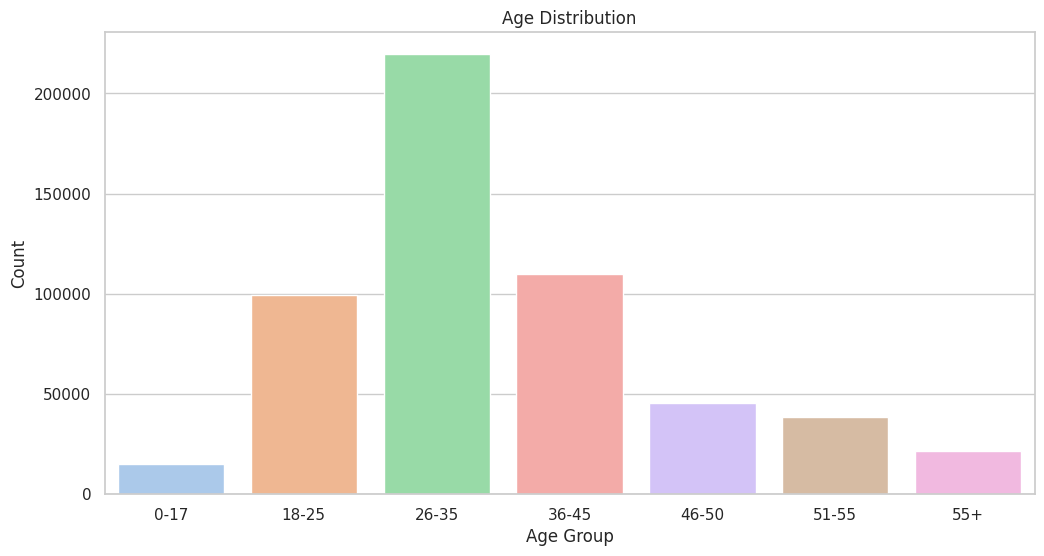

In [ ]:
# Chart - 1 visualization code
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.countplot(x='Age', data=df, palette='pastel', order = ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"])
plt.title('Age Distribution')  # Set plot title
plt.xlabel('Age Group')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

I picked the bar chart because it is a good way to visualize data that is divided into categories. The height of each bar represents the number of people in each age group. This makes it easy to see which age groups are the largest and which are the smallest.

##### 2. What is/are the insight(s) found from the chart?

The insights that can be found from the chart are:

* The largest age group is the 26-35 age group.
* The next largest age group is the 36-45 age group.
* The smallest age group is the 0-17 age group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the largest age groups (26-35 and 36-45) can help tailor marketing strategies and product offerings to better meet their preferences and needs, potentially increasing customer engagement and sales.

#### Chart - 2

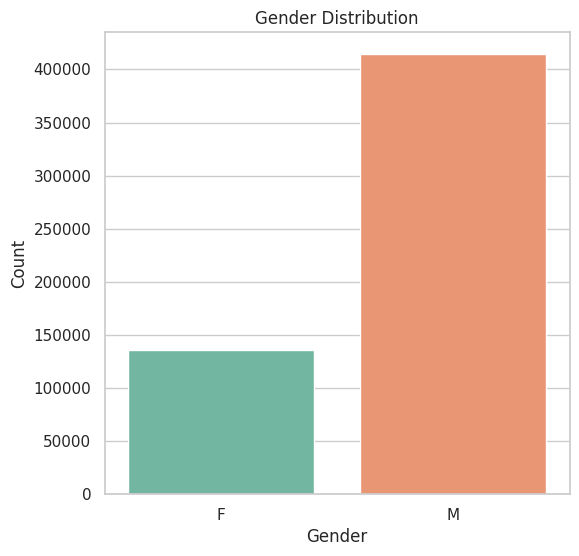

In [ ]:
# Chart - 2 visualization code
# Plotting gender distribution
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
sns.countplot(x ='Gender', data = df, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is ideal for the comparing the different categories of the data. The height of the bar represents the count of the people for each Gender.

##### 2. What is/are the insight(s) found from the chart?

From the graph, we can see that there is a significant gender imbalance, with a much higher count of males compared to females.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight could inform targeted marketing and product development strategies. However, it might also highlight potential market gaps for female-specific products or services.

#### Chart - 3

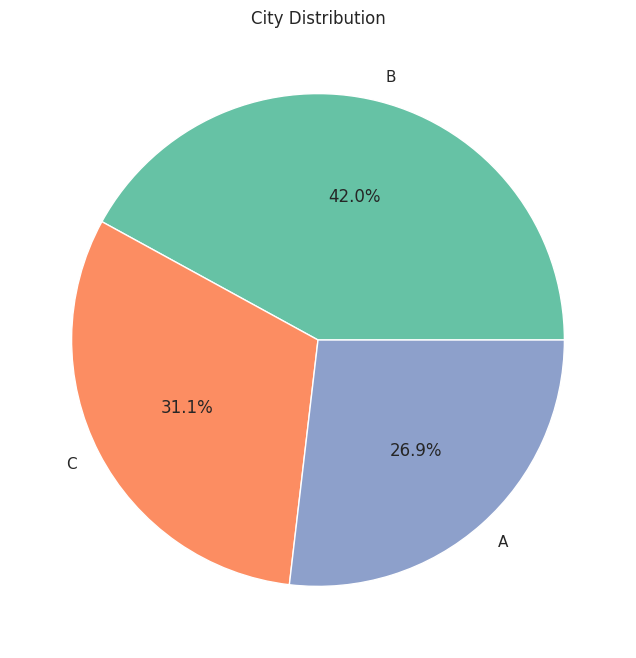

In [ ]:
# Chart - 3 visualization code
# Count the occurrences of each city category
city_counts = df['City_Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', len(city_counts)))

plt.title('City Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Pie Chart is ideal for the distribution of the different categories and the size of the each pie represents the number of people belongs to the City Category of the each pie.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see that people belonging to City B have made highest purchases in the retail store, followed by city C and then city A.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focusing more on City B, the highest purchasing city, can optimize resources and marketing efforts to capitalize on the existing demand, potentially boosting overall sales and customer satisfaction.

City A, with the lowest purchasing activity, might indicate untapped potential or issues such as competition or market saturation that could hinder growth if not addressed with targeted strategies to increase sales in that area.

#### Chart - 4

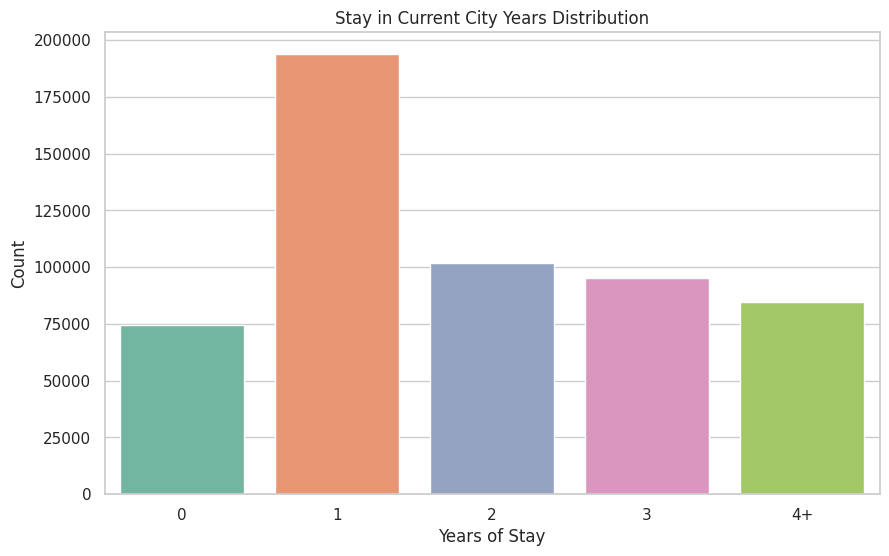

In [ ]:
# Chart - 4 visualization code
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Adjust figure

# Plotting Stay_In_Current_City_Years distribution
sns.countplot(x='Stay_In_Current_City_Years', data=df, palette='Set2',
              order = ['0', '1', '2', '3', '4+'])
plt.title('Stay in Current City Years Distribution')
plt.xlabel('Years of Stay')
plt.ylabel('Count')

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

Bar Chart is ideal for comparing the different categories of the data. The height of the bar represents the number of people for each year of stay.

##### 2. What is/are the insight(s) found from the chart?

Most purchases have from the customers who have stayed for one year of the stay in the city.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights can help target marketing and tailor services to specific customer segments based on their length of stay. A high turnover rate in the first year might indicate potential retention issues.

#### Chart - 5

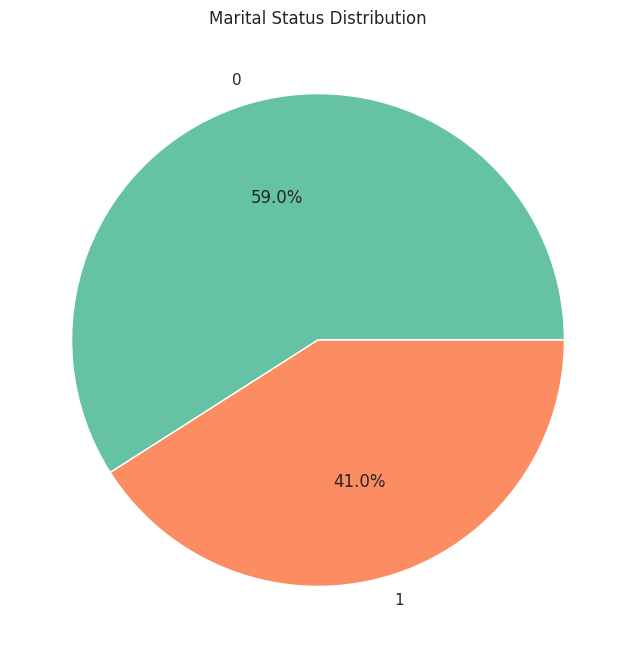

In [ ]:
# Chart - 5 visualization code
# Count the occurrences of each marital status
marital_status_counts = df['Marital_Status'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(marital_status_counts, labels = marital_status_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', len(marital_status_counts)))

plt.title('Marital Status Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Pie Chart is ideal for the distribution of the different categories and the size of the each pie represents the number of people belongs to the percentage of the people belongs to the category of the that marital status.

##### 2. What is/are the insight(s) found from the chart?

The majority (59%) have marital status 0, while the remaining 41% have marital status 1.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights can inform targeted marketing and product development. However, without knowing the categories represented by 0 and 1, it's difficult to assess specific impacts.

#### Chart - 6

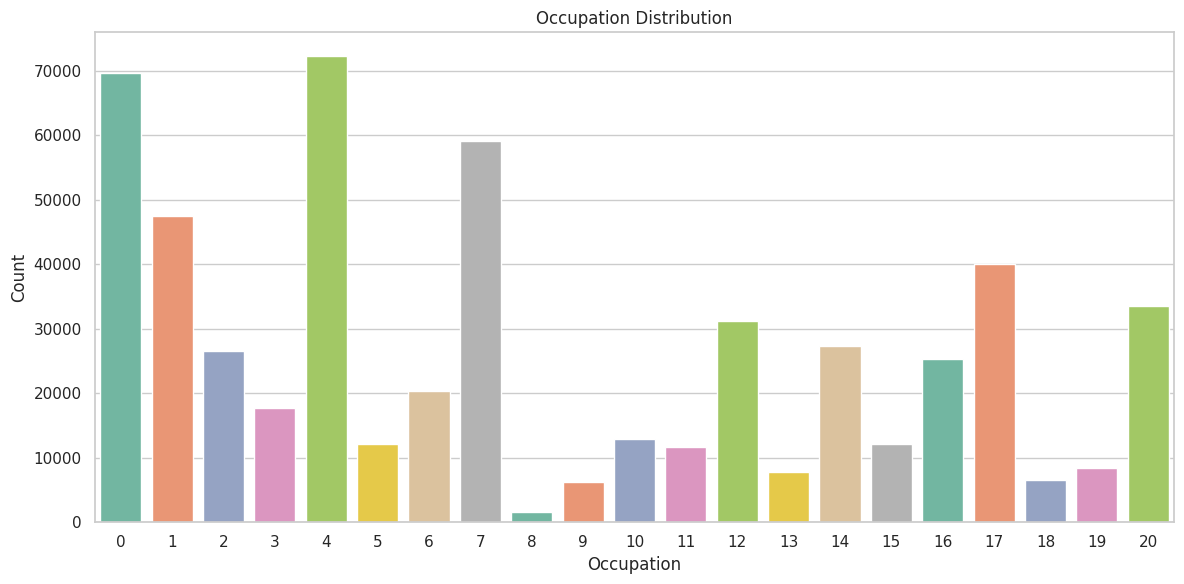

In [ ]:
# Chart - 6 visualization code
# Set the style of the plot
sns.set(style="whitegrid")

# Adjust figure size if needed
plt.figure(figsize=(12, 6))

# Plotting occupation distribution
sns.countplot(x='Occupation', data = df, palette='Set2')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart are effective for comparing the number of customers belonging to each occupation.

##### 2. What is/are the insight(s) found from the chart?

The Highest number of the customers belonging to occupation are '4', '0', '7' where as the lowest number of customers belonging to the occupation are '8', '9', '18'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focusing on occupations with high counts might yield better results, but neglecting others could lead to missed opportunities.

#### Chart - 7

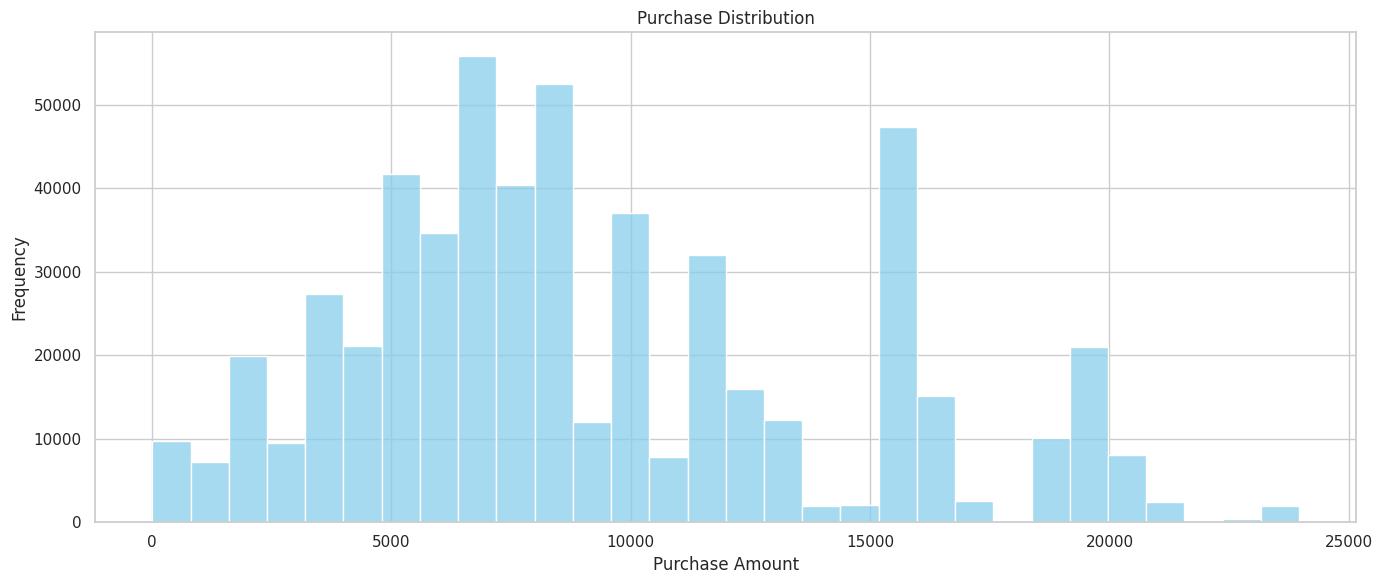

In [ ]:
# Chart - 7 visualization code
# Set the style of the plot
sns.set(style="whitegrid")

# Adjust figure size if needed
plt.figure(figsize=(14, 6))

# Plotting the histogram for the 'Purchase' column
sns.histplot(df['Purchase'], bins=30, color='skyblue')
plt.title('Purchase Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
# Printing the Skewness
print('Skewness: ', round(df['Purchase'].skew(),4))

Skewness:  0.6001


##### 1. Why did you pick the specific chart?

Histogram are ideal for the effective visualization of the distribution of the continuous data of the purchase amount and to visualize the Skewness of the Purchase Amount.

##### 2. What is/are the insight(s) found from the chart?

The purchase amounts are concentrated between 5000 and 15000, with a few peaks and valleys. There are some very high purchase amounts, but they are relatively rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights can help tailor marketing and product offerings to different customer segments based on spending habits. Identifying the reasons for unusually high or low purchase amounts could reveal opportunities or challenges.

#### Chart - 8

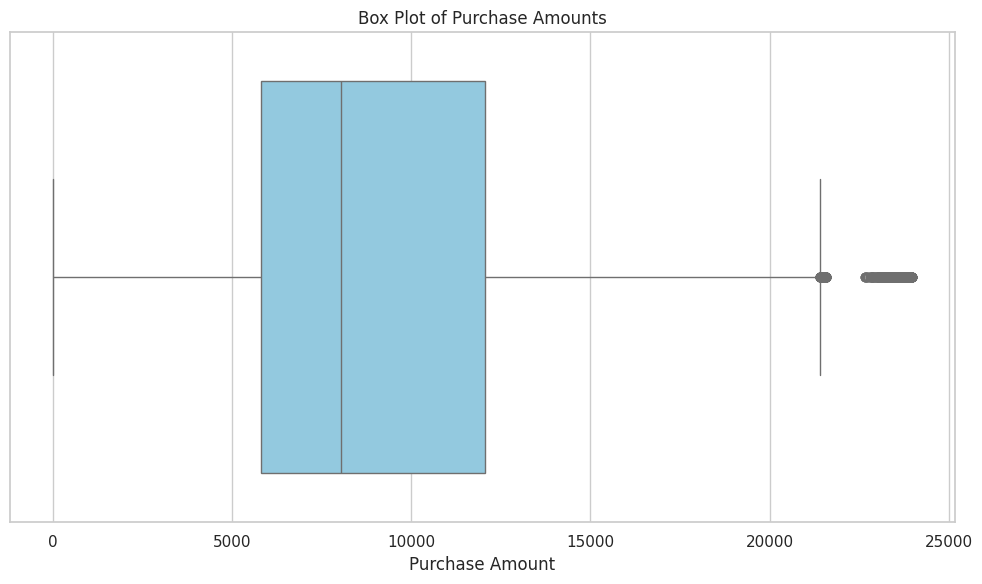

In [ ]:
# Chart - 8 visualization code
# Set the style of the plot
sns.set(style="whitegrid")

# Adjust figure size if needed
plt.figure(figsize=(10, 6))

# Plotting the box plot for the 'Purchase' column
sns.boxplot(x=df['Purchase'], color='skyblue')
plt.title('Box Plot of Purchase Amounts')
plt.xlabel('Purchase Amount')

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

##### 1. Why did you pick the specific chart?

Box plots effectively visualize the distribution of continuous data, including its central tendency, spread, and outliers.

##### 2. What is/are the insight(s) found from the chart?

The presence of numerous outliers, as illustrated in the boxplot, suggests the necessity to address and potentially remove these extreme values for a more robust analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights can help tailor marketing and product offerings to different customer segments based on spending habits. Identifying the reasons for unusually high or low purchase amounts could reveal opportunities or challenges.

#### Chart - 9

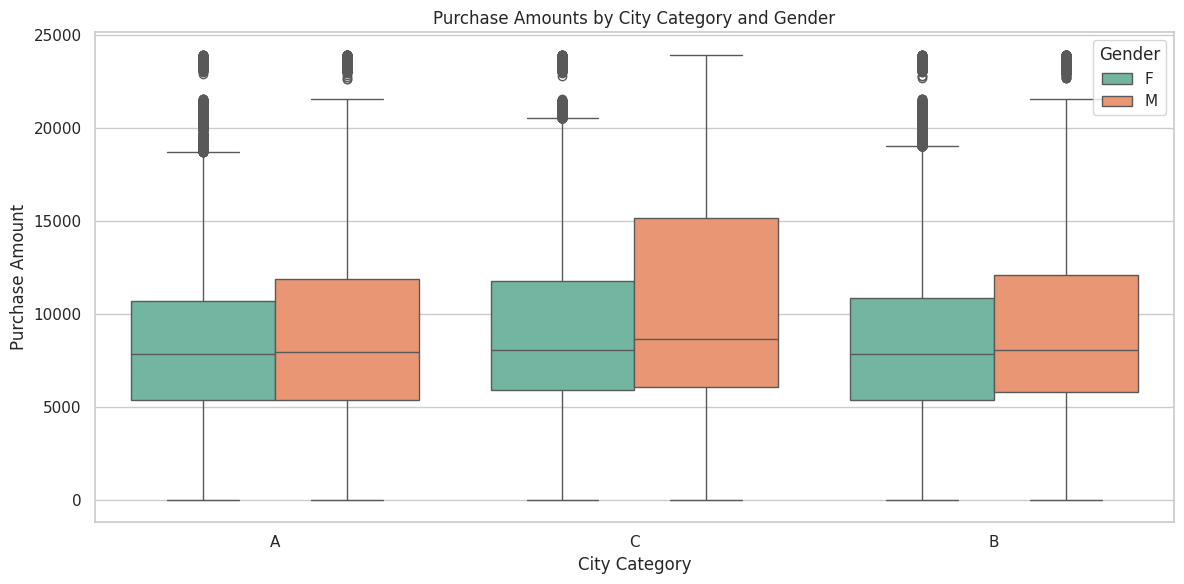

In [ ]:
# Chart - 9 visualization code
# Set the style of the plot
sns.set(style="whitegrid")

# Adjust figure size if needed
plt.figure(figsize=(12, 6))

# Plotting the box plot for 'Purchase' by 'City_Category' and 'Gender'
sns.boxplot(x='City_Category', y='Purchase', data=df, palette='Set2', hue='Gender')

# Set the title and labels
plt.title('Purchase Amounts by City Category and Gender')
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')

# Move the legend to the top right
plt.legend(title='Gender', loc='upper right')

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

##### 1. Why did you pick the specific chart?

Box plots effectively compare distributions across categories and used to identigy the outliers

##### 2. What is/are the insight(s) found from the chart?

Males tend to have higher purchase amounts than females in all city categories. There is significant variation in purchase amounts within each city Category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help tailor marketing and product offerings to specific demographics. Focusing on factors contributing to higher purchase amounts for males could increase revenue.

#### Chart - 10 - Correlation Heatmap

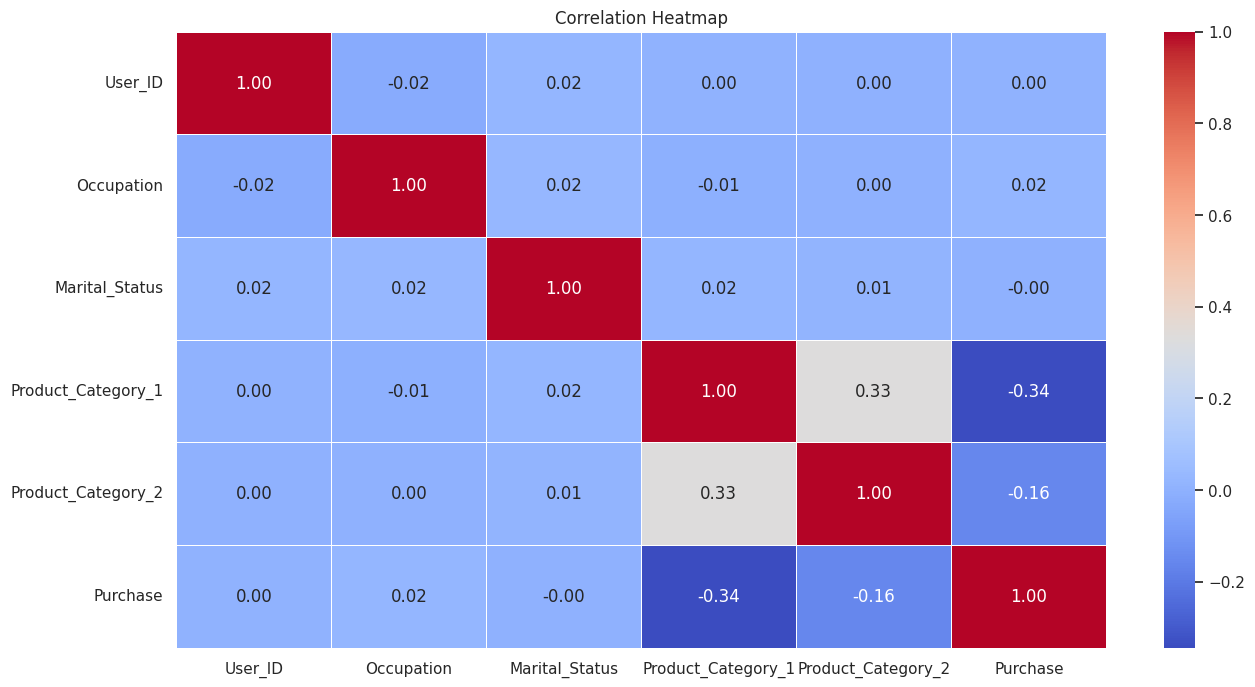

In [ ]:
# Correlation Heatmap visualization code
# Selecting only numeric columns from your DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15, 8))  # Set the figure size
correlation = numeric_columns.corr()  # Compute the correlation matrix

# Plotting the correlation heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')  # Set the title of the plot

plt.show()

##### 1. Why did you pick the specific chart?

To understand the correlation between the differnet variables in our dataset.

##### 2. What is/are the insight(s) found from the chart?

There is a moderate positive correlation between Product_Category_1 and Product_Category_2. Purchase has a moderate negative correlation with Product_Category_1. The other relationships are relatively weak.

#### Chart - 11 - Pair Plot

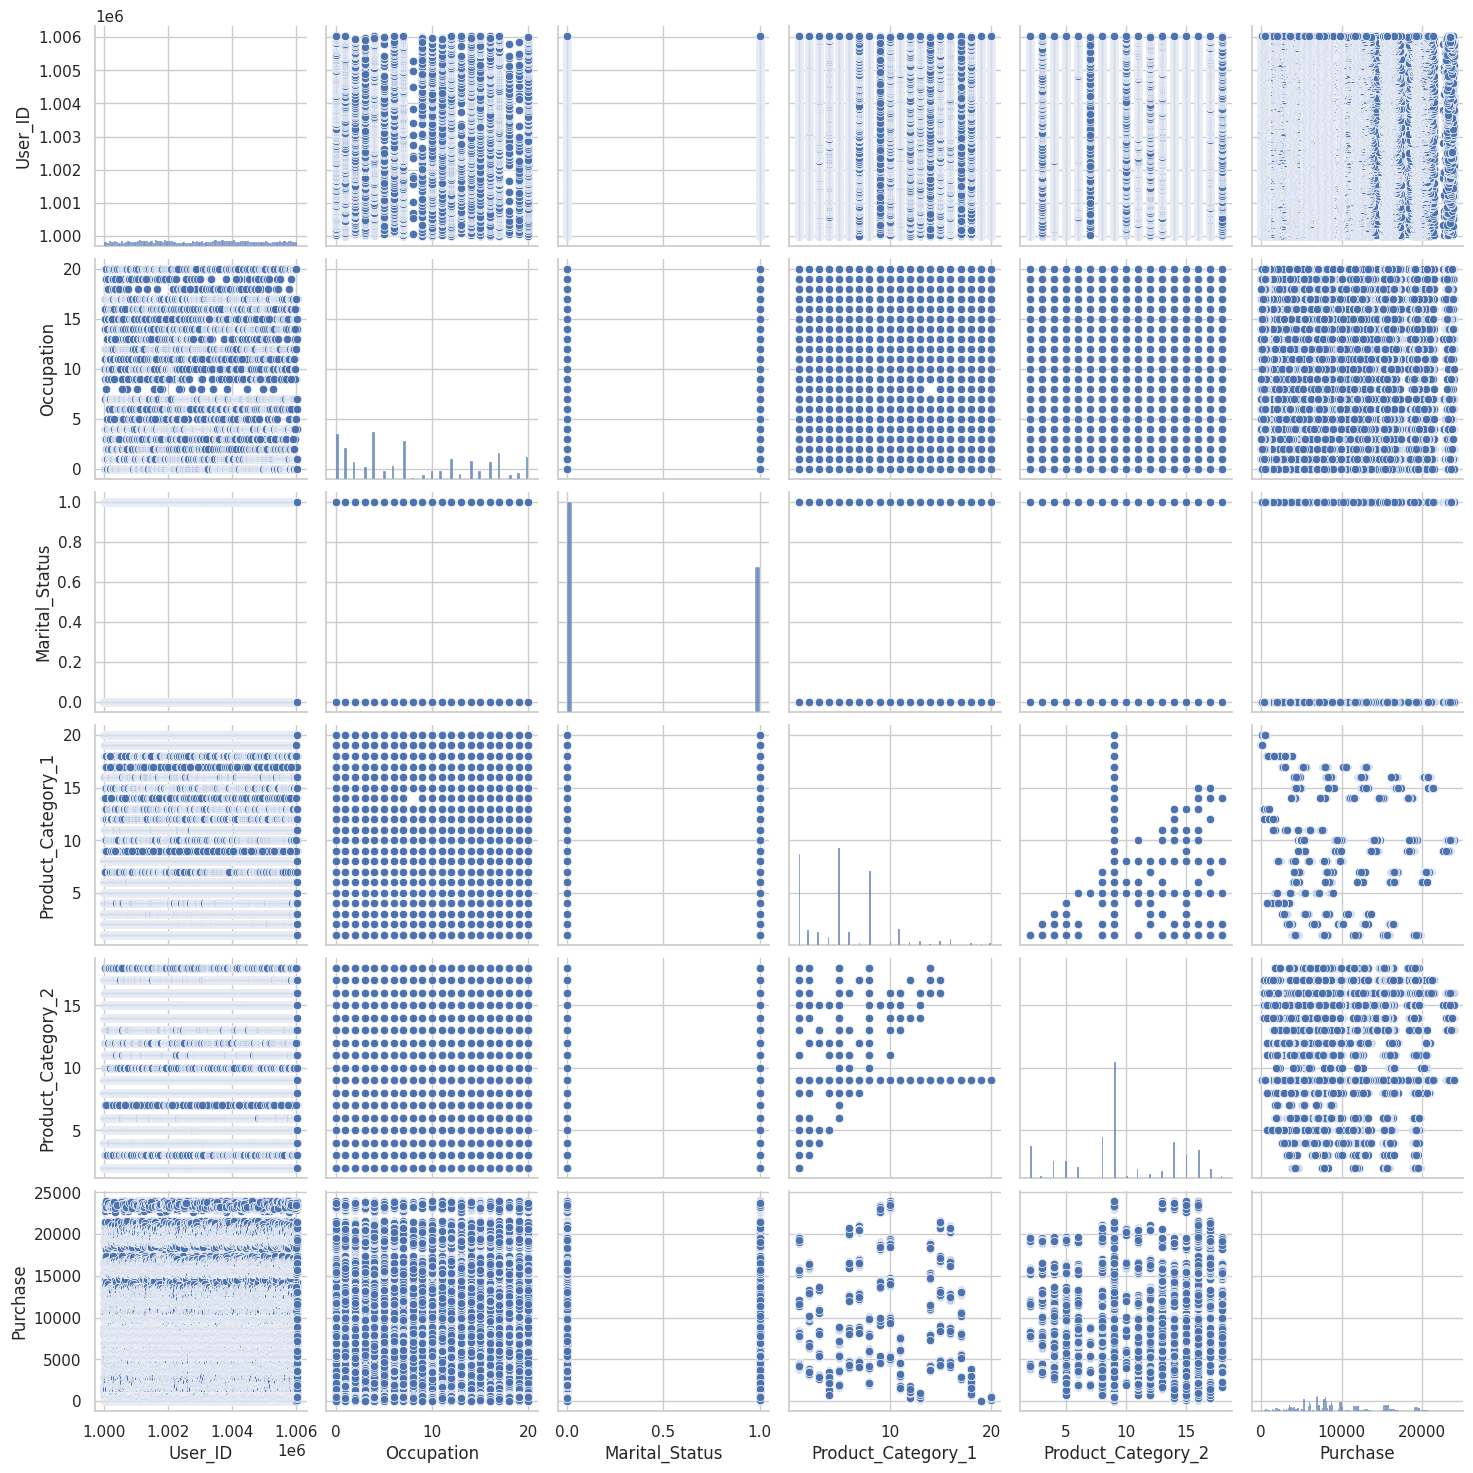

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. It gives us in single large picture. This is used essentially to get to know about our data and how our target variable is related with the rest of the variables.

##### 2. What is/are the insight(s) found from the chart?

There seems to be a positive correlation between Product_Category_1 and Product_Category_2. Purchase has a moderate negative correlation with Product_Category_1. The other relationships are relatively weak.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Statement 1:** The average purchase amount differs significantly between different city categories (City_Category).

**Statement 2:** There is a significant difference in the average purchase amount between different age groups (Age).

**Statement 3:** There is a significant difference in the average purchase amount between male and female customers.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Statement:** The average purchase amount differs significantly between different city categories (City_Category).

**Null Hypothesis (H0):** There is no significant difference in the average purchase amount between different city categories.

**Alternative Hypothesis (H1):** There is a significant difference in the average purchase amount between different city categories.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
df['City_Category'] = df['City_Category'].astype('category')

# Perform ANOVA
anova_result = stats.f_oneway(df[df['City_Category'] == 'A']['Purchase'],
                              df[df['City_Category'] == 'B']['Purchase'],
                              df[df['City_Category'] == 'C']['Purchase'])

print("ANOVA result for City_Category: F-statistic =", anova_result.statistic)
print("P-Value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average purchase amount between different city categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average purchase amount between different city categories.")

ANOVA result for City_Category: F-statistic = 1130.7459610102974
P-Value: 0.0
Reject the null hypothesis: There is a significant difference in the average purchase amount between different city categories.


##### Which statistical test have you done to obtain P-Value?

I performed an ANOVA (Analysis of Variance) test to obtain the p-value.

##### Why did you choose the specific statistical test?

ANOVA is appropriate because we are comparing the means of the purchase amounts across more than two groups (City_Category A, B, and C).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Statement :** There is a significant difference in the average purchase amount between different age groups (Age).

**Null Hypothesis (H0):** There is no significant difference in the average purchase amount between different age groups.

**Alternative Hypothesis (H1):** There is a significant difference in the average purchase amount between different age groups.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Ensure the data types are correct
df['Age'] = df['Age'].astype('category')

# Perform ANOVA
anova_result_age = stats.f_oneway(df[df['Age'] == '0-17']['Purchase'],
                                  df[df['Age'] == '18-25']['Purchase'],
                                  df[df['Age'] == '26-35']['Purchase'],
                                  df[df['Age'] == '36-45']['Purchase'],
                                  df[df['Age'] == '46-50']['Purchase'],
                                  df[df['Age'] == '51-55']['Purchase'],
                                  df[df['Age'] == '55+']['Purchase'])

print("ANOVA result for Age: F-statistic =", anova_result_age.statistic)
print("P-Value:", anova_result_age.pvalue)

if anova_result_age.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average purchase amount between different age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average purchase amount between different age groups.")

ANOVA result for Age: F-statistic = 40.57579909450407
P-Value: 1.053563939251671e-49
Reject the null hypothesis: There is a significant difference in the average purchase amount between different age groups.


##### Which statistical test have you done to obtain P-Value?

I performed an ANOVA (Analysis of Variance) test to obtain the p-value.

##### Why did you choose the specific statistical test?

ANOVA is used because we are comparing the means of the purchase amounts across multiple age groups (e.g., 0-17, 18-25, etc.).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Statement:** There is a significant difference in the average purchase amount between male and female customers.

**Null Hypothesis (H0):** There is no significant difference in the average purchase amount between male and female customers.

**Alternative Hypothesis (H1):** There is a significant difference in the average purchase amount between male and female customers.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Ensure the data types are correct
df['Gender'] = df['Gender'].astype('category')

# Perform t-test
t_test_result = stats.ttest_ind(df[df['Gender'] == 'M']['Purchase'],
                                df[df['Gender'] == 'F']['Purchase'])

print("T-test result for Gender: t-statistic =", t_test_result.statistic)
print("P-Value:", t_test_result.pvalue)

if t_test_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average purchase amount between male and female customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average purchase amount between male and female customers.")

T-test result for Gender: t-statistic = 44.837957934353966
P-Value: 0.0
Reject the null hypothesis: There is a significant difference in the average purchase amount between male and female customers.


##### Which statistical test have you done to obtain P-Value?

I performed an independent t-test to obtain the p-value.

##### Why did you choose the specific statistical test?

An independent t-test is suitable for comparing the means of purchase amounts between two groups (male and female customers).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in this dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

# Calculate Q1 (25th percentile) and Q3 (75th percentile) and IQR
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)]

print("Number of outliers in 'Purchase':", outliers.shape[0])

Number of outliers in 'Purchase': 2677


In [ ]:
percentage_outliers = (len(outliers) / len(df)) * 100
print(f"Percentage of outliers using IQR method: {percentage_outliers:.2f}%")

Percentage of outliers using IQR method: 0.49%


##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers in the dataset are not removed or imputed, Outliers in the 'Purchase' column, accounting for only 0.49% of the data, represent legitimate high-value purchases. These outliers provide valuable insights into customer behavior, highlighting significant purchasing patterns. Therefore, keeping them intact allows for a more comprehensive understanding of the dataset and helps capture critical business opportunities associated with high-value transactions.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("Number of unique values in",i,"is",df[i].nunique())

Number of unique values in User_ID is 5891
Number of unique values in Product_ID is 3631
Number of unique values in Gender is 2
Number of unique values in Age is 7
Number of unique values in Occupation is 21
Number of unique values in City_Category is 3
Number of unique values in Stay_In_Current_City_Years is 5
Number of unique values in Marital_Status is 2
Number of unique values in Product_Category_1 is 20
Number of unique values in Product_Category_2 is 17
Number of unique values in Purchase is 18105


In [ ]:
# Define Ordered Columns
ordered_columns = ["Age", "Stay_In_Current_City_Years"]

# Define Unordered Columns
unordered_columns = ['Gender', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category_1', 'Product_Category_2']

In [ ]:
# Define ordered categories
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
stay_order = ['0', '1', '2', '3', '4+']

# Create OrdinalEncoder and fit_transform on the ordered columns
ordinal_encoder = OrdinalEncoder(categories=[age_order, stay_order])
df[ordered_columns] = ordinal_encoder.fit_transform(df[ordered_columns])

# Create OneHotEncoder and fit_transform on the unordered columns
onehot_encoder = OneHotEncoder(sparse=False)
encoded_unordered = onehot_encoder.fit_transform(df[unordered_columns])

# Create a DataFrame for the one-hot encoded columns
encoded_unordered_df = pd.DataFrame(encoded_unordered, columns=onehot_encoder.get_feature_names_out(unordered_columns))

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df_final = pd.concat([df.drop(unordered_columns, axis=1), encoded_unordered_df], axis=1)

df_final.head()

,User_ID,Product_ID,Age,Stay_In_Current_City_Years,Purchase,Gender_F,Gender_M,Occupation_0,Occupation_1,Occupation_2,...,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
0,1000001,P00069042,0.0,2.0,8370,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000001,P00248942,0.0,2.0,15200,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000001,P00087842,0.0,2.0,1422,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000001,P00085442,0.0,2.0,1057,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1000002,P00285442,6.0,4.0,7969,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### What all categorical encoding techniques have you used & why did you use those techniques?

There are 8 categorical columns in this dataset, so we need to encode them to the numerical values. I defined the ordered and unordered columns and used ordinal encoder for the ordered columns and onehot encoder for the unordered columns and finally concatenating the final dataframe unordered encoded columns with the ordered encoded columns.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

This dataset does not have the Textual Data. So, it doesn't require the Textual Data Preprocessing.

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# List of columns to drop from the final DataFrame, typically identifiers
Id_columns = [ 'User_ID', 'Product_ID']

# Drop the specified columns from df_final
df_final = df_final.drop(Id_columns, axis=1)

# Display the first few rows of the modified DataFrame
df_final.head()

,Age,Stay_In_Current_City_Years,Purchase,Gender_F,Gender_M,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,...,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
0,0.0,2.0,8370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,15200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.0,1422,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.0,1057,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6.0,4.0,7969,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Create a Copy
new_df = df_final.copy()

In [ ]:
# Drop the 'Purchase' column from the DataFrame new_df
new_df = new_df.drop('Purchase', axis=1)

# Display the first few rows of the modified DataFrame
new_df.head()

,Age,Stay_In_Current_City_Years,Gender_F,Gender_M,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,...,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Select relevant features
X = new_df

# Target variable
y = df_final['Purchase']

##### What all feature selection methods have you used  and why?

Features were selected based on the correlation analysis and the Statistical tests and all the variables are showing the significant effect on the purchase exept the user ID and product ID and it is not selected.

##### Which all features you found important and why?

Features like 'Age', 'City_Category', and 'Product_Category_1' emerged as crucial due to their significant impact on purchase behavior in the dataset. These variables provide insights into demographic trends, geographical preferences, and product categories that influence customer spending patterns, aiding targeted marketing strategies and product recommendations.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No transformation is needed because all selected features are categorical variables that have been appropriately encoded (ordinal and one-hot encoding). Categorical encoding preserves the meaningful distinctions and relationships within these variables for analysis or modeling purposes. Therefore, the data is adequately prepared without the need for further transformation.

In [ ]:
# Transform Your data

### 6. Data Scaling

Data scaling is unnecessary because the features under consideration are categorical, not continuous, and do not require normalization or standardization for magnitude consistency. Categorical variables encoded using techniques like ordinal or one-hot encoding retain their inherent structure and relationships without scaling. Therefore, scaling operations such as normalization or standardization are not applicable for this dataset.

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not necessary for this project because the dataset primarily consists of categorical variables that have been encoded into meaningful representations (ordinal and one-hot encoding). These categorical dimensions are essential for understanding specific attributes like age groups, city categories, and product preferences, which are pivotal in domain-specific analyses.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Splitting the data into a train and a test set by using train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check the shape of the training and testing sets
print("Shape of x_train:", X_train.shape)
print("Shape of x_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (440054, 67)
Shape of x_test: (110014, 67)
Shape of y_train: (440054,)
Shape of y_test: (110014,)


##### What data splitting ratio have you used and why?

I've used an 80-20 data splitting ratio (80% training, 20% testing) to ensure a sufficient amount of data for training the model while maintaining an adequate portion for evaluating its performance on unseen data. This ratio strikes a balance between training effectiveness and model evaluation reliability.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

I do not think the data is imbalanced.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

**Linear Regresssion**

In [ ]:
# ML Model - 1 Implementation
# Initialize the model
model_1 = LinearRegression()

# Fit the Algorithm
model_1.fit(X_train, y_train)

# Predict on the model
y_pred_1 = model_1.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used the Linear Regression model, a fundamental and interpretable machine learning algorithm that assumes a linear relationship between the independent variables (features) and the dependent variable (target). Linear Regression fits a line to the data by minimizing the sum of squared differences between the observed and predicted values, providing coefficients that quantify the impact of each feature on the target variable. This model is effective for understanding how changes in customer attributes and product features influence purchase amounts, offering clear insights into the data while being computationally efficient.


In [ ]:
# Calculating Mean Squared Error (MSE) for predictions
mse_1 = mean_squared_error(y_test, y_pred_1)

# Calculating Root Mean Squared Error (RMSE)
rmse_1 = np.sqrt(mse_1)

# Calculating R-squared (R2) score for predictions
r2_1 = r2_score(y_test, y_pred_1)

# Calculating Adjusted R-squared (Adjusted R2) score for predictions
Adjusted_R2_1 = (1 - (1 - r2_1)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

# Calculating Mean Absolute Error (MAE)
mae_1 = mean_absolute_error(y_test, y_pred_1)

In [ ]:
# Creating a DataFrame to store evaluation metrics for the Random Forest regressor model
eval_metric_1 = pd.DataFrame([mse_1, rmse_1, r2_1, Adjusted_R2_1, mae_1], columns=['Linear Regression'], index=['MSE', 'RMSE', 'R2', 'Adj R2', 'MAE'])

# Printing the evaluation metrics
eval_metric_1

,Linear Regression
MSE,9.128937e+06
RMSE,3.021413e+03
R2,6.366763e-01
Adj R2,6.370643e-01
MAE,2.280233e+03


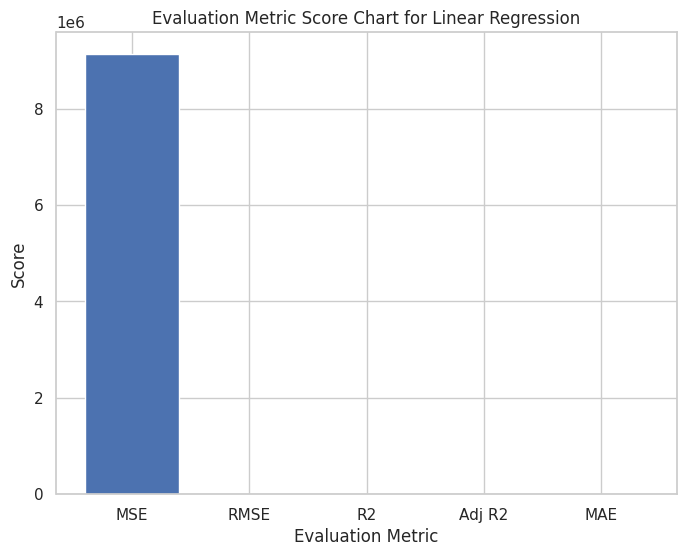

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = ['MSE', 'RMSE', 'R2', 'Adj R2', 'MAE']
scores = [mse_1, rmse_1, r2_1, Adjusted_R2_1, mae_1]

# Plot the evaluation metric score chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart for Linear Regression')
plt.show()

### ML Model - 2

**Random Forest**

In [ ]:
# ML Model - 2 Implementation
# Initialize the model
model_2 = RandomForestRegressor()

# Fit the Algorithm
X_train_samples = X_train.sample(100000, random_state=42)
y_train_samples = y_train.sample(100000, random_state=42)
model_2.fit(X_train_samples, y_train_samples)

# Predict on the model
y_pred_2 = model_2.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Random Forest**

I used the Random Forest Regressor, a powerful ensemble learning method that builds multiple decision trees and combines their outputs to improve predictive accuracy and control overfitting. This model is well-suited for handling both numerical and categorical data, providing robust predictions even with complex interactions and non-linear relationships. By averaging the results of various decision trees, it reduces the variance and enhances the generalizability of the model, making it effective for predicting the purchase amounts based on diverse customer attributes and product features in the dataset.

In [ ]:
# Calculating Mean Squared Error (MSE) for predictions
mse_2 = mean_squared_error(y_test, y_pred_2)

# Calculating Root Mean Squared Error (RMSE)
rmse_2 = np.sqrt(mse_2)

# Calculating R-squared (R2) score for predictions
r2_2 = r2_score(y_test, y_pred_2)

# Calculating Adjusted R-squared (Adjusted R2) score
Adjusted_R2_2 = (1 - (1 - r2_2)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

# Calculating Mean Absolute Error (MAE)
mae_2 = mean_absolute_error(y_test, y_pred_2)

In [ ]:
# Creating a DataFrame to store evaluation metrics for the Random Forest model
eval_metric_2 = pd.DataFrame([mse_2, rmse_2, r2_2, Adjusted_R2_2, mae_2], columns=['Random Forest'], index=['MSE', 'RMSE', 'R2', 'Adj R2', 'MAE'])

# Printing the evaluation metrics
eval_metric_2

,Random Forest
MSE,1.002283e+07
RMSE,3.165886e+03
R2,6.011000e-01
Adj R2,6.014663e-01
MAE,2.312698e+03


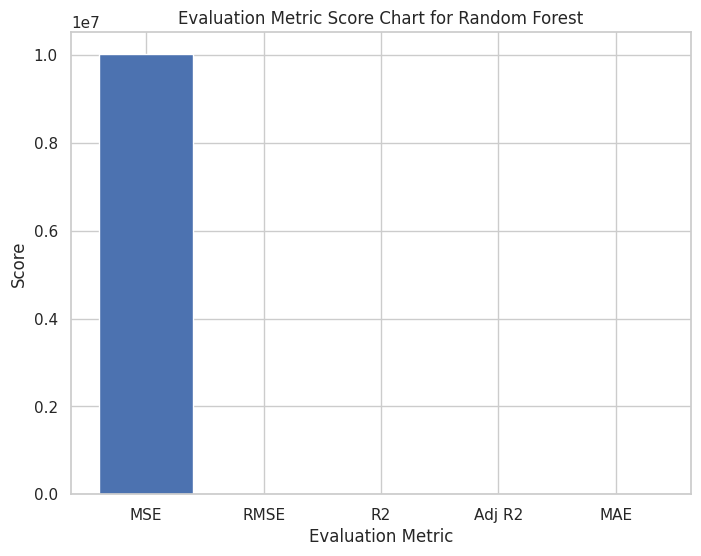

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = ['MSE', 'RMSE', 'R2', 'Adj R2', 'MAE']
scores = [mse_2, rmse_2, r2_2, Adjusted_R2_2, mae_2]

# Plot the evaluation metric score chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart for Random Forest')
plt.show()

In [ ]:
# Concatenating the existing 'eval_metrics' DataFrame with 'eval_metric_2' along axis 1 (columns)
eval_metrics = pd.concat([eval_metric_1, eval_metric_2], axis=1)

# Displaying the updated 'eval_metrics' DataFrame containing evaluation metrics for multiple models
eval_metrics

,Linear Regression,Random Forest
MSE,9.128937e+06,1.002283e+07
RMSE,3.021413e+03,3.165886e+03
R2,6.366763e-01,6.011000e-01
Adj R2,6.370643e-01,6.014663e-01
MAE,2.280233e+03,2.312698e+03


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**MSE (Mean Squared Error):**

MSE quantifies the average squared difference between predicted and actual values. Lower MSE indicates more precise predictions, critical for minimizing financial losses and optimizing investment strategies.

**RMSE (Root Mean Squared Error):**

RMSE is the square root of MSE and measures the average magnitude of prediction errors. It provides a clear understanding of the typical deviation of predicted stock prices from actual values, aiding risk assessment and decision-making.

**R2 (R-squared):**

R2 indicates the proportion of variance in stock prices explained by the model. A higher R2 signifies stronger predictive power, offering confidence in the model's ability to explain and forecast stock price movements accurately.

**Adjusted R2 (Adjusted R-squared):**

Adjusted R2 adjusts R2 for the number of predictors in the model, providing a more realistic assessment of its explanatory power. It penalizes excessive complexity, ensuring that improvements in R2 are meaningful and not due to overfitting. Higher Adjusted R2 reflects a robust model with balanced complexity and predictive accuracy.

**MAE (Mean Absolute Error):**

MAE measures the average absolute difference between predicted and actual values. It provides a straightforward assessment of prediction accuracy without considering the direction of errors. Lower MAE suggests better accuracy in predicting stock prices, enhancing the reliability of financial forecasts and investment strategies.

### ML Model - 3

**XG Boost**

In [ ]:
# ML Model - 3 Implementation
model_3 = XGBRegressor()

# Fit the Algorithm
model_3.fit(X_train, y_train)

# Predict on the model
y_pred_3 = model_3.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used the XGBoost model, an advanced gradient boosting algorithm that builds an ensemble of decision trees sequentially to optimize model performance. XGBoost excels in handling complex, non-linear relationships within the data and can manage both numerical and categorical features effectively. Its regularization techniques prevent overfitting, and its efficiency in computation makes it suitable for large datasets. This model is particularly useful for predicting purchase amounts by capturing intricate patterns and interactions in customer attributes and product features, leading to highly accurate predictions.

In [ ]:
# Calculating Mean Squared Error (MSE) for predictions
mse_3 = mean_squared_error(y_test, y_pred_3)

# Calculating Root Mean Squared Error (RMSE)
rmse_3 = np.sqrt(mse_3)

# Calculating R-squared (R2) score for predictions
r2_3 = r2_score(y_test, y_pred_3)

# Calculating Adjusted R-squared (Adjusted R2) score for predictions
Adjusted_R2_3 = (1 - (1 - r2_3)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

# Calculating Mean Absolute Error (MAE)
mae_3 = mean_absolute_error(y_test, y_pred_3)

In [ ]:
# Creating a DataFrame to store evaluation metrics for the XGBoost model
eval_metric_3 = pd.DataFrame([mse_3, rmse_3, r2_3, Adjusted_R2_3, mae_3], columns=['XGBoost'], index=['MSE', 'RMSE', 'R2', 'Adj R2', 'MAE'])

# Printing the evaluation metrics
eval_metric_3

,XGBoost
MSE,8.694502e+06
RMSE,2.948644e+03
R2,6.539664e-01
Adj R2,6.543649e-01
MAE,2.204412e+03


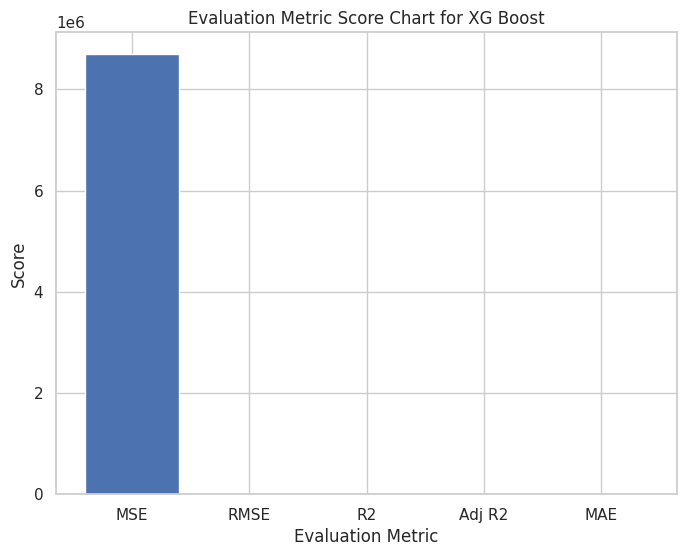

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = ['MSE', 'RMSE', 'R2', 'Adj R2', 'MAE']
scores = [mse_3, rmse_3, r2_3, Adjusted_R2_3, mae_3]

# Plot the evaluation metric score chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart for XG Boost')
plt.show()

In [ ]:
# Concatenating the existing 'eval_metrics' DataFrame with 'eval_metric_3' along axis 1 (columns)
eval_metrics = pd.concat([eval_metrics, eval_metric_3], axis=1)

# Displaying the updated 'eval_metrics' DataFrame containing evaluation metrics for multiple models
eval_metrics

,Linear Regression,Random Forest,XGBoost
MSE,9.128937e+06,1.002283e+07,8.694502e+06
RMSE,3.021413e+03,3.165886e+03,2.948644e+03
R2,6.366763e-01,6.011000e-01,6.539664e-01
Adj R2,6.370643e-01,6.014663e-01,6.543649e-01
MAE,2.280233e+03,2.312698e+03,2.204412e+03


### Hyperparameter Fine Tuning

Based on the Evaluation metrics scores, the XGBoost model appears to be the best candidate for fine-tuning.

* Mean Squared Error (MSE) and Root Mean Squared Error (RMSE): XGBoost has the lowest MSE and RMSE values, indicating that its predictions are closest to the actual values compared to the other models.
* R-squared (R2) and Adjusted R-squared (Adj R2): XGBoost has the highest R2 and Adjusted R2 scores, showing that it explains the most variance in the target variable.
* Mean Absolute Error (MAE): XGBoost also has the lowest MAE, suggesting it has the smallest average error in its predictions.

Thus, XGBoost is the most accurate model according to these metrics, making it the best candidate for further fine-tuning to potentially enhance its performance even more.

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialize the model
xgboost = XGBRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'max_depth': 7, 'n_estimators': 200}


In [ ]:
# Train the model with the best parameters
best_xgboost = XGBRegressor(**best_params, random_state=42)
best_xgboost.fit(X_train, y_train)

# Predict on the test set
y_pred = best_xgboost.predict(X_test)

In [ ]:
# Calculating Mean Squared Error (MSE) for predictions
mse = mean_squared_error(y_test, y_pred)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculating R-squared (R2) score for predictions
r2 = r2_score(y_test, y_pred)

# Calculating Adjusted R-squared (Adjusted R2) score for predictions
Adjusted_R2 = (1 - (1 - r2_3)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
# Creating a DataFrame to store evaluation metrics for the XGBoost model
eval_metric = pd.DataFrame([mse, rmse, r2, Adjusted_R2, mae], columns=['XGBoost_Fine_Tuned'], index=['MSE', 'RMSE', 'R2', 'Adj R2', 'MAE'])

# Printing the evaluation metrics
eval_metric

,XGBoost_Fine_Tuned
MSE,8.533488e+06
RMSE,2.921213e+03
R2,6.603746e-01
Adj R2,6.543649e-01
MAE,2.171280e+03


In [ ]:
# Concatenating the existing 'eval_metrics' DataFrame with 'eval_metric' along axis 1 (columns)
eval_metrics = pd.concat([eval_metrics, eval_metric], axis=1)

# Displaying the updated 'eval_metrics' DataFrame containing evaluation metrics for multiple models
eval_metrics

,Linear Regression,Random Forest,XGBoost,XGBoost_Fine_Tuned
MSE,9.128937e+06,1.002283e+07,8.694502e+06,8.533488e+06
RMSE,3.021413e+03,3.165886e+03,2.948644e+03,2.921213e+03
R2,6.366763e-01,6.011000e-01,6.539664e-01,6.603746e-01
Adj R2,6.370643e-01,6.014663e-01,6.543649e-01,6.543649e-01
MAE,2.280233e+03,2.312698e+03,2.204412e+03,2.171280e+03


### Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost (Extreme Gradient Boosting):
XGBoost is an advanced implementation of gradient boosting that is highly efficient, flexible, and portable. It provides a powerful ensemble method that builds an additive model in a forward stage-wise fashion. By combining the predictions of multiple decision trees, XGBoost aims to optimize a loss function and control overfitting through regularization. It handles missing data well and is robust to overfitting with the help of parameters like max_depth, subsample, and learning_rate.

Feature Importance Explanation Using SHAP:

To understand the importance of each feature in the model’s predictions, I used SHAP (SHapley Additive exPlanations). SHAP provides a way to explain the output of the machine learning model by assigning each feature an importance value for a particular prediction.

Key Insights:

* Summary Plot: This plot shows the distribution of SHAP values for each feature. Features are sorted by their importance, with the most important ones at the top. Each dot represents a Shapley value for an instance, and the color indicates whether the feature value is high (red) or low (blue).

* Feature Importance Plot: This bar plot shows the average absolute SHAP value for each feature. It helps in understanding which features have the most significant impact on the model’s predictions.

* Dependence Plot: This plot shows the relationship between the SHAP value of a specific feature and the actual feature value. It illustrates how changes in a feature’s value impact the prediction.

By using SHAP, we can clearly see which features are most influential in determining purchase amounts. For example, features like 'Age', 'Occupation', and 'Product_Category' might show high importance, indicating that they significantly affect the prediction.

In [ ]:
# Initialize SHAP explainer
explainer = shap.Explainer(best_xgboost, X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

100%|===================| 109971/110014 [09:06<00:00]       

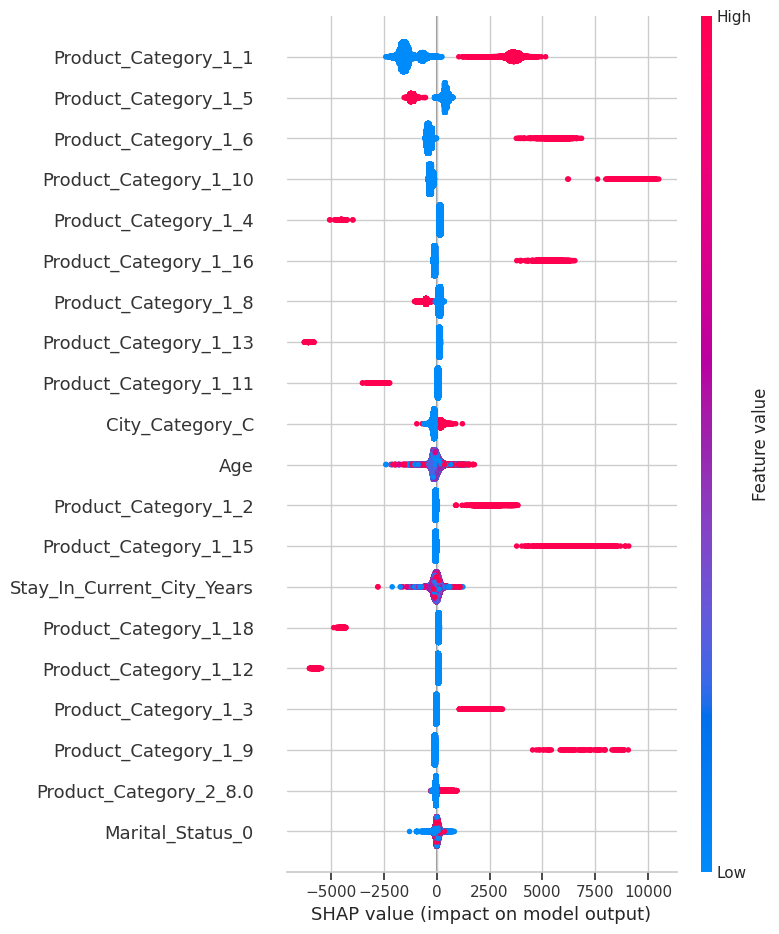

In [ ]:
# Summary plot
shap.summary_plot(shap_values, X_test)

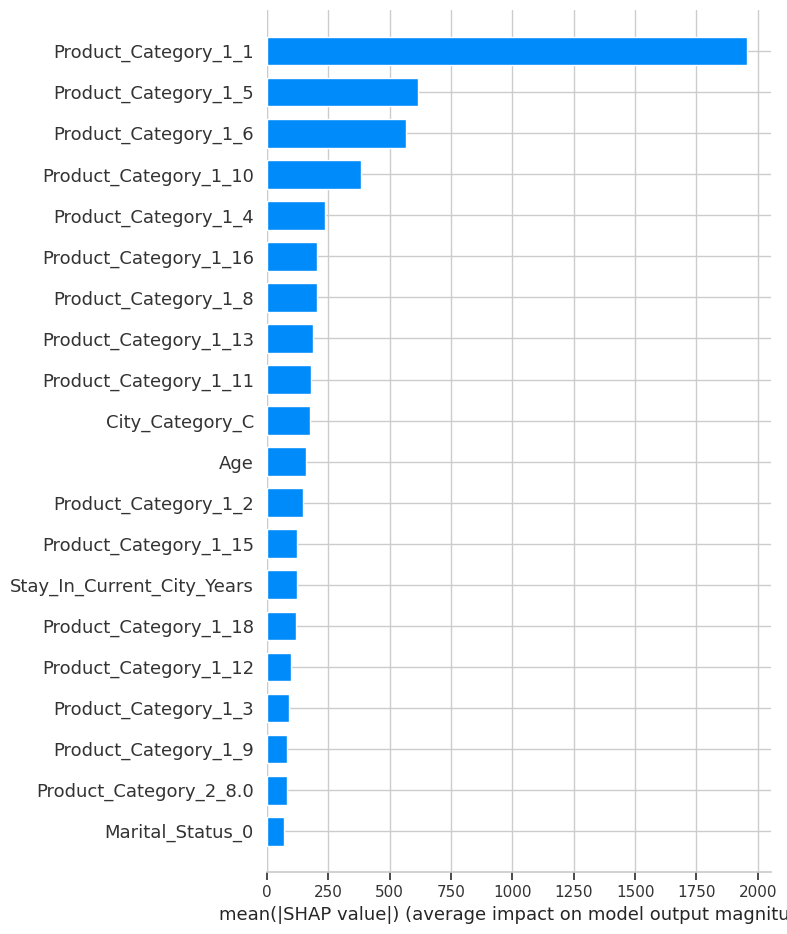

In [ ]:
# Feature importance plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

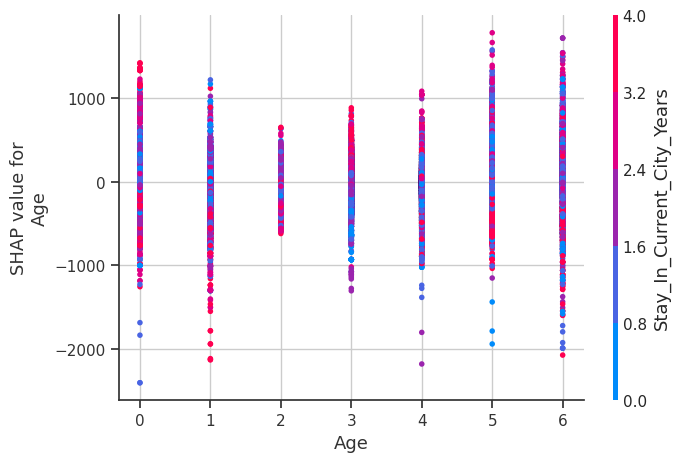

In [ ]:
# Assuming shap_values is already computed correctly
# Initialize SHAP plot for dependence plot
shap.initjs()

# Create the dependence plot
shap.dependence_plot("Age", shap_values.values, X_test)

# Display the plot
plt.show()

# **Conclusion**

The main goal of this project was to develop a reliable predictive model for estimating purchase amounts in a Black Friday dataset. The project began with thorough data acquisition and understanding, followed by extensive preprocessing steps, including data cleaning, feature engineering, and exploratory data analysis (EDA). EDA helped uncover relationships between variables and identify key features for modeling.

Several machine learning algorithms were implemented and evaluated, including Linear Regression, Random Forest, and XGBoost. Each model was rigorously assessed using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2), Adjusted R-squared, and Mean Absolute Error (MAE). Hyperparameter tuning was conducted using GridSearchCV to optimize model performance.

The results showed that XGBoost emerged as the best-performing model, demonstrating superior performance with lower RMSE and higher R-squared compared to other models. Feature importance analysis using SHAP revealed that attributes such as 'Product_Category', 'Age' and 'City Category' significantly influenced purchase predictions, highlighting their critical role in the model’s accuracy.

In conclusion, the project successfully achieved its objective of building an accurate predictive model for purchase amounts. The chosen XGBoost model, optimized through cross-validation and hyperparameter tuning, provides a reliable tool for stakeholders to make data-driven decisions. Future enhancements could include incorporating more recent data, exploring advanced modeling techniques, and considering additional demographic or economic factors to further improve prediction accuracy.

Overall, this project underscores the value of machine learning in understanding consumer behavior and making informed business decisions.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***